In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns

0. Importing datasets 

In [2]:
# Import food dataset
df_crop = pd.read_csv('../data/food_bank/crop1.csv')

# Import smoking dataset
df_smoking = pd.read_csv('../data/smoking/smoking.csv')

1. Data Exploration

a. Explore the dataset by displaying the first few rows, summary statistics, and data types of each column.

In [3]:
# Display first few rows
df_crop.head()

,Area,Item,Element,Year,Unit,Value
0,Afghanistan,"Almonds, with shell",Area harvested,1975,ha,0.0
1,Afghanistan,"Almonds, with shell",Area harvested,1976,ha,5900.0
2,Afghanistan,"Almonds, with shell",Area harvested,1977,ha,6000.0
3,Afghanistan,"Almonds, with shell",Area harvested,1978,ha,6000.0
4,Afghanistan,"Almonds, with shell",Area harvested,1979,ha,6000.0


In [4]:
pd.set_option('display.max_columns', 13)

df_smoking.head()

,sex,age,height,weight,waistline,sight_left,...,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,...,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,...,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,...,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,...,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,...,0.8,19.0,12.0,25.0,1.0,N


In [5]:
# Summary
df_crop.describe()

,Year,Value
count,1.895975e+06,1.766475e+06
mean,1.992321e+03,1.077275e+06
std,1.718118e+01,1.403138e+07
min,1.961000e+03,0.000000e+00
25%,1.978000e+03,4.500000e+03
50%,1.994000e+03,2.687500e+04
75%,2.007000e+03,1.303910e+05
max,2.020000e+03,1.955308e+09


In [6]:
pd.set_option('display.max_columns', 9)
df_smoking.describe()

,age,height,weight,waistline,...,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,...,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,...,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,...,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,...,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,...,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,...,9999.000000,7210.000000,999.000000,3.000000


In [7]:
# Data types
df_crop.dtypes

Area        object
Item        object
Element     object
Year         int64
Unit        object
Value      float64
dtype: object

In [8]:
df_smoking.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

b. Identify missing values, outliers, and unique values in categorical columns.

In [9]:
# Identify missing values
crop_missing = df_crop.isnull().sum()
print("Missing Values:\n", crop_missing, sep='')

Missing Values:
Area            0
Item            0
Element         0
Year            0
Unit            0
Value      129500
dtype: int64


In [10]:
# Identify missing values
smoking_missing = df_smoking.isnull().sum()
print("Missing Values:\n", smoking_missing, sep='')

Missing Values:
sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64


/tmp/ipykernel_10010/2832379131.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_smoking['weight'], palette='viridis')


<Axes: ylabel='weight'>

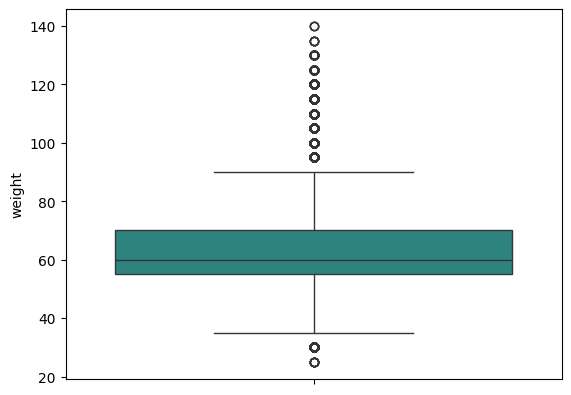

In [11]:
sns.boxplot(df_smoking['weight'], palette='viridis')


In [12]:
# Identify unique values in categorical columns
crop_categorical = df_crop.select_dtypes(include=['object']).columns
crop_unique = {col: df_crop[col].unique() for col in crop_categorical}

print(f"Unique Areas:{len(crop_unique.get('Area'))}")
print(f"Unique Elements:{len(crop_unique.get('Element'))}")
print(f"Unique Items:{len(crop_unique.get('Item'))}")
print(f"Unique Units:{len(crop_unique.get('Unit'))}")

Unique Areas:245
Unique Elements:3
Unique Items:118
Unique Units:3


We find that there are lots of missing "value" values.
These are often the same crop, thus we have no good data for that particular crop anyways.
We might just drop the rows where the "value" is missing as it will not help improve our model

2. Data Cleaning

In [28]:
# Get all rows with missing values
missing = df_crop.isnull().any(axis=1)
missing

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [14]:
# Drop columns with missing values
crop_clean = df_crop.dropna(axis=1)

# Check for missing values
print("Missing Values:\n", crop_clean.isnull().sum(), sep='')

Missing Values:
Area       0
Item       0
Element    0
Year       0
Unit       0
dtype: int64


3. Handling Outliers

a. Detect outliers using methods such as the IQR method or Z-score.

In [15]:
# Filter out categorical columns, leaving only numerical
smoking_numerical = df_smoking.select_dtypes(include=[np.number])
smoking_numerical.head()

,age,height,weight,waistline,...,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
0,35,170,75,90.0,...,21.0,35.0,40.0,1.0
1,30,180,80,89.0,...,20.0,36.0,27.0,3.0
2,40,165,75,91.0,...,47.0,32.0,68.0,1.0
3,50,175,80,91.0,...,29.0,34.0,18.0,1.0
4,50,165,60,80.0,...,19.0,12.0,25.0,1.0


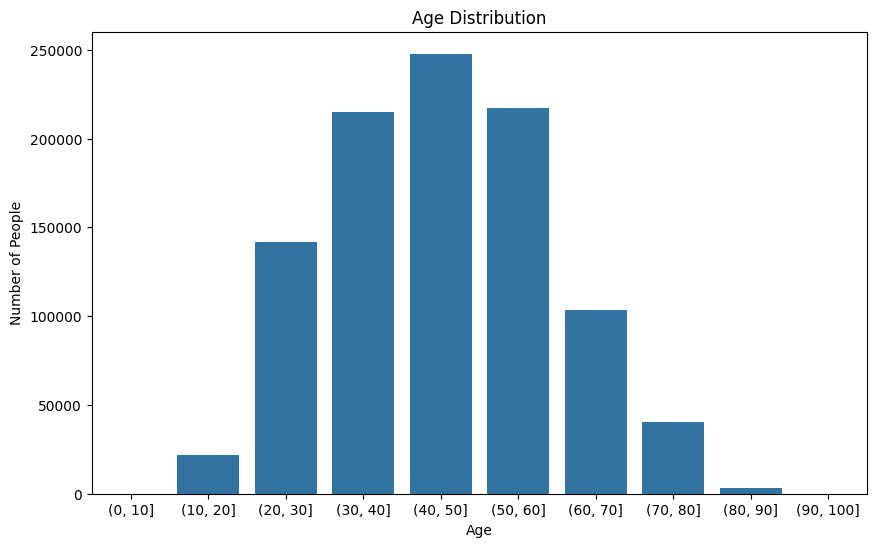

In [35]:
# Print age column as a grapical representation
plt.figure(figsize=(10, 6))
df_smoking['age_bins'] = pd.cut(df_smoking['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
sns.countplot(x='age_bins', data=df_smoking)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.show()

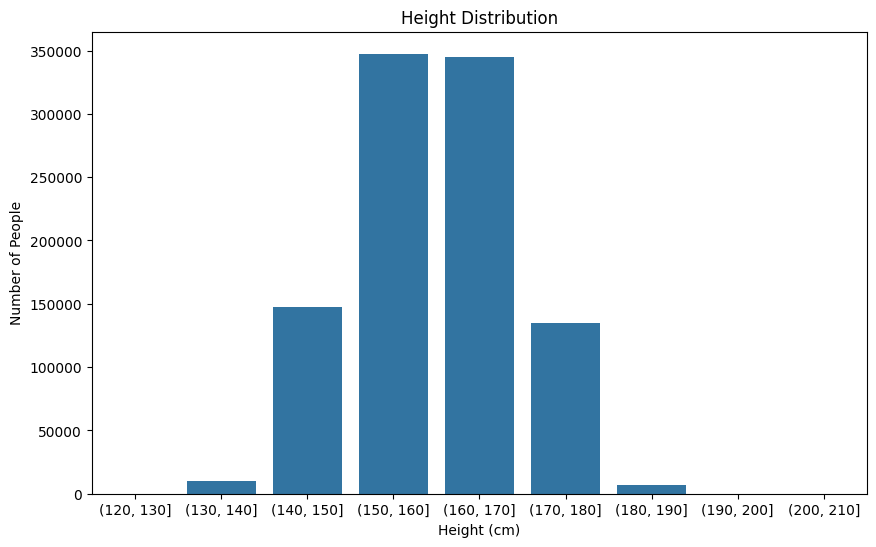

In [37]:
# Print height column as a grapical representation
plt.figure(figsize=(10, 6))
df_smoking['height_bins'] = pd.cut(df_smoking['height'], bins=[120,130,140,150,160,170,180,190,200,210])
sns.countplot(x='height_bins', data=df_smoking)
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Number of People')
plt.show()

In [38]:
# Identify outliers using the IQR method


#Q1 = smoking_numerical.quantile(0.25)
#Q3 = smoking_numerical.quantile(0.75)
#IQR = Q3 - Q1
#outliers = ((smoking_numerical < (Q1 - 1.5 * IQR)) | (smoking_numerical > (Q3 + 1.5 * IQR))).sum()
#print("\nOutliers:\n", outliers, sep='')

In [18]:
from scipy import stats
import numpy as np

# Calculate the z-scores
z_scores = np.abs(stats.zscore(smoking_numerical))

# Set the threshold for outliers (z > 3 or z < -3)
outliers_zscore = (z_scores > 3).sum()

print("\nOutliers (Z-Score Method):\n", outliers_zscore, sep='')


Outliers (Z-Score Method):
age                     0
height                 86
weight               4580
waistline             638
sight_left           3118
sight_right          3111
hear_left           31222
hear_right          30212
SBP                  6423
DBP                  6205
BLDS                18620
tot_chole            4937
HDL_chole            3877
LDL_chole            4177
triglyceride        14631
hemoglobin           6966
urine_protein       25321
serum_creatinine     1421
SGOT_AST             5887
SGOT_ALT            10370
gamma_GTP           15361
SMK_stat_type_cd        0
dtype: int64


b. Decide whether to remove, cap, or transform the outliers. Justify your decisions

In [52]:
# Delete the outliers
smoking_clean = smoking_numerical[(z_scores < 3).all(axis=1)]

# Print the shape of the cleaned dataset
print("\nCleaned Dataset Number Rows:", smoking_clean.shape[0])

# Print the shape of the original dataset
print("Original Dataset Number Rows:", smoking_numerical.shape[0])

print("\nNumber of Rows Removed:", smoking_numerical.shape[0] - smoking_clean.shape[0])
percentage_removed = (smoking_numerical.shape[0] - smoking_clean.shape[0]) / smoking_numerical.shape[0] * 100
print("Percentage of Rows Removed: {:.2f}%".format(percentage_removed))



Cleaned Dataset Number Rows: 846398
Original Dataset Number Rows: 991346

Number of Rows Removed: 144948
Percentage of Rows Removed: 14.62%


4. Data Transformation

a. Encoding Categorical Data

i. Apply label encoding or one-hot encoding to transform categorical data into 
numerical form.

In [19]:
# Apply one-hot encoding to categorical columns
crop_onehot = pd.get_dummies(df_crop, columns=['Area', 'Element', 'Item', 'Unit'])
crop_onehot.head()

# Print columns amount
print(f"Columns amount: {len(crop_onehot.columns)}")

Columns amount: 371


Why do we use one-hot encoding over label encoding?


b. Feature Scaling

i. Apply feature scaling techniques such as normalization (Min-Max scaling) or 
standardization (Z-score normalization) to the dataset.

ii. Explain why feature scaling is necessary and how it impacts the model.

5. Data Splitting

a. Split the preprocessed dataset into training and testing sets. Typically, an 80-20 or 70-30 split is used.

b. Explain the importance of splitting the data and how it prevents overfitting.